# connectome_query examples:

-connectivity distributions for an roi

-connections to targets

-connectivity-based parcellation

-comparing connectivity distributions

-connectivity contrasts

-network analyses


In [1]:
import nilearn.plotting as nlplt
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import seaborn as sns; sns.set()
import pandas as pd
import connectome_query as cq
from matplotlib.colors import ListedColormap
%matplotlib inline

/anaconda2/envs/python3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
query = cq.Query('testing/test.h5')

# Connectivity distributions for an roi

In [3]:
%time paths = query.sum_streamline_count('../mpfc_clusters/masks/MPFC_mask.nii.gz', output='nifti')

CPU times: user 3.59 s, sys: 4.25 s, total: 7.85 s
Wall time: 9.63 s


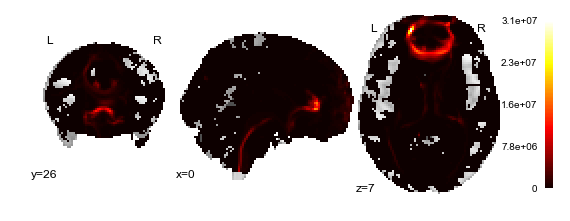

In [4]:
nlplt.plot_stat_map(paths, draw_cross=False)

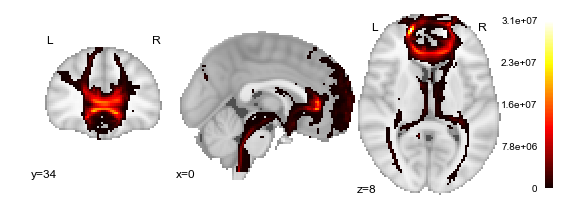

In [5]:
from nilearn.image import threshold_img
thres_paths = threshold_img(paths, threshold='97%')
nlplt.plot_stat_map(thres_paths, draw_cross=False)

# Connections to targets

We can also look at the connectivity from an roi to some other defined areas. As an example we can look at the connections between our MPFC mask and each of the harvard-oxford cortical labels.

In [6]:
from nilearn import datasets
dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = np.array(dataset.labels)
labels = np.delete(labels,0)

In [7]:
%time connections = query.connections_to_targets('../mpfc_clusters/masks/MPFC_mask.nii.gz',targets=atlas_filename,as_df=True,labels=labels)

CPU times: user 3.34 s, sys: 2.4 s, total: 5.74 s
Wall time: 5.88 s


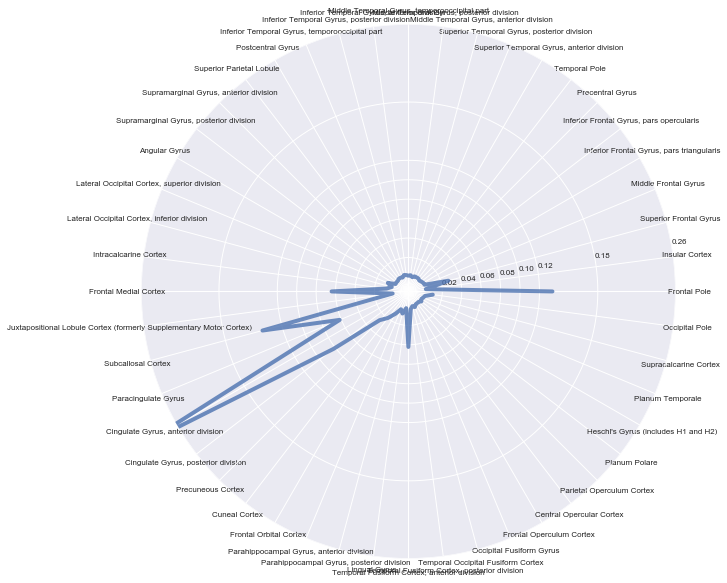

In [8]:
fig = plt.figure(figsize=(10,10))
theta = np.linspace(0.00, 2 * np.pi, len(connections['labels']), endpoint=False)
ax = plt.subplot(111, projection='polar')
ax.plot(theta, connections['percent'],alpha = 0.8, linewidth=4)
ax.set_rmax(.14)
ax.set_rticks([0.02, 0.04, 0.06, 0.08,0.1,0.12,0.18,0.26])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)
ax.set_xticks(theta)

ax.set_rlabel_position(10)
ax.set_xticklabels(connections['labels'], fontsize=8)
[lab.set_fontsize(8) for lab in ax.get_yticklabels()]

#ax.set_title("vACC cluster connectivity profile", va='bottom')
plt.tight_layout()
plt.show()

In [9]:
connections

,connections,normalized_connections,percent,labels
0,1.081931e+10,7.026896e+05,0.133321,Frontal Pole
1,3.913577e+07,1.671755e+04,0.003172,Insular Cortex
2,7.409524e+08,1.458568e+05,0.027673,Superior Frontal Gyrus
3,8.598062e+07,1.617393e+04,0.003069,Middle Frontal Gyrus
4,1.598889e+07,1.449582e+04,0.002750,"Inferior Frontal Gyrus, pars triangularis"
5,1.294125e+07,9.350616e+03,0.001774,"Inferior Frontal Gyrus, pars opercularis"
6,4.324234e+07,5.044015e+03,0.000957,Precentral Gyrus
7,4.731535e+07,1.004359e+04,0.001906,Temporal Pole
8,4.863145e+06,9.334251e+03,0.001771,"Superior Temporal Gyrus, anterior division"
9,1.733723e+07,9.473895e+03,0.001797,"Superior Temporal Gyrus, posterior division"


# Connectivity-based parcellation

To do cbp, the under-the-hood operations are very simple. Firstly, we isolate the roi within the matrix resulting in an roi by rest of the brain matrix. An essential step in this data is to standardize the rows. Results won't be interpretable without this step. However, if you wish to proceed without standardization you need only include 'standardize=False' in the function call. Next we find the correlation between each of the rows resulting in an roi x roi correlation matrix. Lastly we run the any of the scikit-learn clustering algorithms or from fastcluster. It returns a nifti.   

In [12]:
%time clusters = query.cluster_roi('../mpfc_clusters/masks/MPFC_mask.nii.gz', n_clusters=4)

CPU times: user 2min 27s, sys: 26.8 s, total: 2min 54s
Wall time: 1min 6s


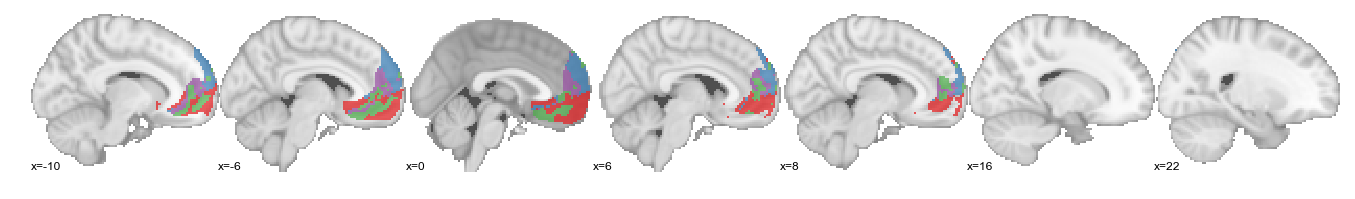

In [13]:
colors = sns.color_palette('Set1', 4)
nlplt.plot_roi(clusters, draw_cross=False, display_mode='x',cmap=ListedColormap(colors))

# Comparing connectivity distributions

After we've finished clustering, or if we have some rois that we'd like to compare, we can get a vector of the connectivity profile for each of the rois in a nifti and return a correlation matrix specifying how similar to connectivity distributions are.

In [14]:
%time similarity = query.roi_similarity(clusters)

CPU times: user 4.77 s, sys: 3.34 s, total: 8.12 s
Wall time: 7.74 s


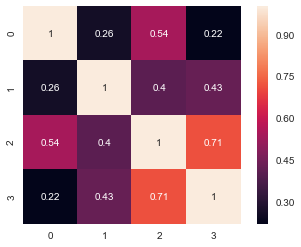

In [15]:
sns.heatmap(similarity, square=True, annot=True, cbar=True)

# Connectivity contrasts

Another way that we can compare the connectivity of several rois is that we can contrast the connectivity of each of the rois against the rest of them to see where in the brain connectivity is greatest per roi.

In [17]:
%time contrasts = query.connectivity_contrast(clusters)

CPU times: user 17.2 s, sys: 11.1 s, total: 28.3 s
Wall time: 27 s


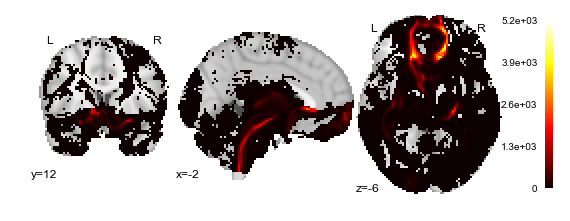

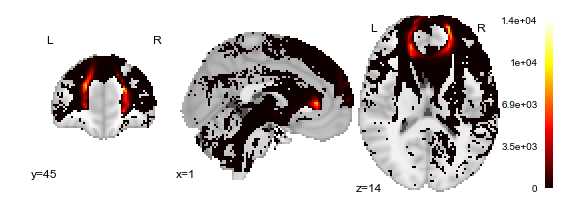

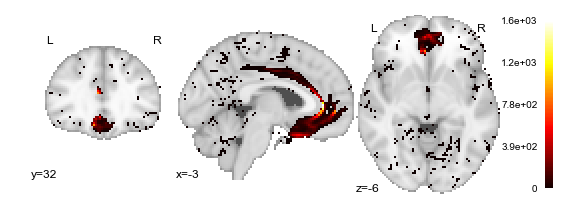

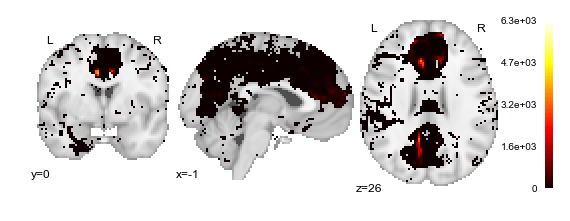

In [18]:
for c in contrasts:
    nlplt.plot_stat_map(c, draw_cross=False)

# Network analyses

We can also do connectome-style network analyses. We need only pass the function a nifti with the rois. Due to the nature of fsl's fiber tracking algorithm and the normalization procedure, the resulting matrix will not be symmetrical. 

In [24]:
%time network = query.network(atlas_filename)

CPU times: user 1min 50s, sys: 2min 9s, total: 4min
Wall time: 4min 35s


In [25]:
normalize = np.array([network[i,:]/network[i,:].sum() for i in range(48)])
normalized_network = pd.DataFrame(normalize, columns=labels, index=labels)

In [26]:
normalized_network

,Frontal Pole,Insular Cortex,Superior Frontal Gyrus,Middle Frontal Gyrus,"Inferior Frontal Gyrus, pars triangularis","Inferior Frontal Gyrus, pars opercularis",Precentral Gyrus,Temporal Pole,"Superior Temporal Gyrus, anterior division","Superior Temporal Gyrus, posterior division",...,Temporal Occipital Fusiform Cortex,Occipital Fusiform Gyrus,Frontal Operculum Cortex,Central Opercular Cortex,Parietal Operculum Cortex,Planum Polare,Heschl's Gyrus (includes H1 and H2),Planum Temporale,Supracalcarine Cortex,Occipital Pole
Frontal Pole,0.540239,0.019950,0.026134,0.028089,0.010125,0.002167,0.015107,0.011673,0.001744,0.004643,...,0.000709,0.003573,0.000174,0.000368,0.000443,0.003270,0.000389,0.004162,0.000488,0.045025
Insular Cortex,0.109646,0.187923,0.011673,0.015390,0.036769,0.011738,0.024770,0.044633,0.005530,0.018754,...,0.000895,0.003754,0.011431,0.021130,0.008273,0.028629,0.010420,0.028026,0.000302,0.064000
Superior Frontal Gyrus,0.295785,0.015469,0.223198,0.089334,0.007477,0.037778,0.083915,0.002670,0.000950,0.002537,...,0.000121,0.000216,0.000535,0.000834,0.000114,0.001279,0.000387,0.001929,0.000035,0.002559
Middle Frontal Gyrus,0.128695,0.018168,0.099739,0.275543,0.017009,0.114954,0.140938,0.006266,0.002234,0.003518,...,0.000192,0.000181,0.000636,0.001173,0.000162,0.002343,0.000731,0.002721,0.000014,0.003883
"Inferior Frontal Gyrus, pars triangularis",0.194912,0.113719,0.040843,0.077811,0.105305,0.041478,0.047984,0.007134,0.002611,0.017712,...,0.000696,0.000884,0.003387,0.002615,0.001650,0.014933,0.001186,0.011893,0.000156,0.035948
"Inferior Frontal Gyrus, pars opercularis",0.050800,0.017595,0.134124,0.165971,0.023328,0.094144,0.233014,0.004759,0.004113,0.007919,...,0.000190,0.000208,0.000904,0.002707,0.000496,0.003074,0.001406,0.006857,0.000020,0.007066
Precentral Gyrus,0.050616,0.020256,0.049989,0.062907,0.006678,0.027692,0.382989,0.003017,0.001202,0.004197,...,0.000198,0.000345,0.000189,0.001925,0.000345,0.001350,0.000514,0.005688,0.000020,0.002513
Temporal Pole,0.150723,0.137411,0.006563,0.008690,0.005989,0.004359,0.008111,0.108294,0.015335,0.015173,...,0.001413,0.011402,0.001207,0.001766,0.001098,0.031483,0.002168,0.007347,0.000764,0.102068
"Superior Temporal Gyrus, anterior division",0.076895,0.033631,0.013948,0.013862,0.007616,0.017554,0.012021,0.089945,0.048243,0.068463,...,0.001847,0.001114,0.000971,0.003418,0.000848,0.023738,0.005917,0.017928,0.000068,0.144851
"Superior Temporal Gyrus, posterior division",0.097634,0.029395,0.008004,0.018248,0.041010,0.045095,0.037562,0.024196,0.024571,0.134062,...,0.000773,0.000426,0.000605,0.001991,0.001641,0.004867,0.002281,0.023731,0.000036,0.043859
